# Analysing a biological network

*Caenorhabditis elegans* (*C. elegans*) is a nematode, and is commonly used as model organism to study developmental biology, and specifically neuronal development. It is one of the simplest organisms with a nervous system, which makes it particularly suited to this research. The majority of _C. elegans_ are hermaphrodites. The developmental trajectory of each somatic cell (in hermaphrodites 959, in males 1031) has been been identified, and is generally consistent between worms. The complete connectome (neuronal map) has been published, originally by White, Southgate, Thomson, and Brenner in 1986, and continues to be researched. Here, nodes represent neurons and edges represent synapses.

## Getting a network matrix from Dynamic Connectome lab

In this final section we want to benefit from network information that is stored in freely available databases.
There are a number of databases that include information about interactions. In the context of biochemical 
reaction networks, two prominent examples are the ([KEGG database](http://www.genome.jp/kegg/pathway.html/))
and the ([Reactome database](http://www.reactome.org/)). In the previous lesson, we have used an example from the [STRING database](https://string-db.org) which contained data about protein-protein interactions (PPI). Other examples are the [BioGrid Database of Protein, Genetic and Chemical Interactions](https://thebiogrid.org) and the [IntAct Molecular Interaction Database](https://www.ebi.ac.uk/legacy-intact/). 

Some researchers also make their data freely available upon publication. In this section we are going to use some simplified data from the [Dynamic Connectome lab](https://www.dynamic-connectome.org/) on the neuronal networks of _C. elegans_.

For simplicity, these data have been edited so only the first 50 of the 131 neurons are included. The Python Pandas library is used to import this data easily. First, we import the adjacency matrix showing how these neurons connect to each other, and a file giving the name of each neuron.

Then, we convert the adjacency matrix to the numpy format, and the labels into a dictionary. We then save the labels (each neuron has a name!) in the NetworkX node label format, and convert the adjacency matrix into the NetworkX format. Finally, we give the graph the layout $random$, and draw it.


In [2]:
import networkx as nx

from matplotlib.pyplot import subplots
from matplotlib.pyplot import axes, axis, title

import collections
 
from pandas import read_csv


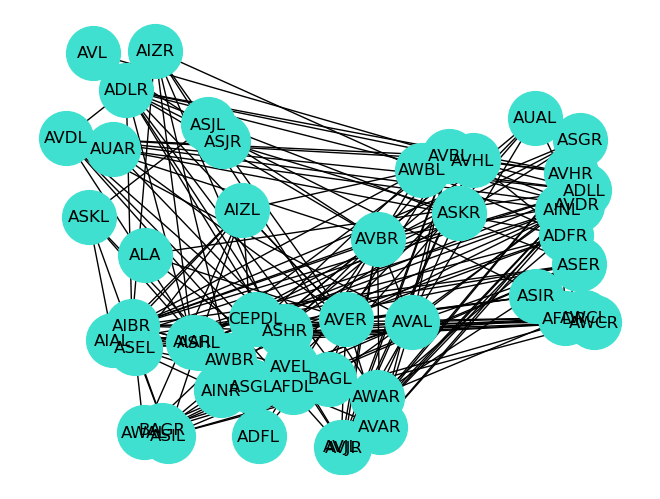

In [7]:
neurons     = read_csv('data/celegans131matrix_50.csv', header = None, dtype = "float64")
neuronNames = read_csv('data/celegans131labels_50.csv', header = None)

neurons     = neurons.to_numpy()
neuronNames = neuronNames.to_dict()

neuronLabels = neuronNames[0]
#numpy_matrix deprecated
neuronGraph  = nx.from_numpy_array(neurons)   

neuronLayout = nx.random_layout(neuronGraph)

nx.draw(neuronGraph, neuronLayout, 
        node_size=1500,
        node_color='turquoise',
        labels = neuronLabels
       )


We can examine this network similar to the way we did for our earlier, smaller networks.

For instance, we can confirm the number of nodes.


In [8]:
neuronGraph.number_of_nodes()

50

Using the techniques we examined above, we can interrogate various aspects of this real-world network, such as finding the node with the greatest centrality, assess the average path length, and find out the clustering coefficient.

# Assignment

1. Compute the number of edges in this _C. elegans_ neuron network.

2. Compute the average clustering coefficient across this network.

3. Calculate the centrality of each node.

4. Find the average shortest path length.

5. Find the shortest path length between neurons 4 and 44

6. Plot the degree distribution of the network with inserted network graph.


In [9]:
print('edges =', neuronGraph.number_of_edges())

edges = 186


In [11]:
print('Average clustering coefficient =', nx.average_clustering(neuronGraph))

Average clustering coefficient = 0.3174194694194694


In [14]:
print('Node centralities =', nx.degree_centrality(neuronGraph))

Node centralities = {0: 0.08163265306122448, 1: 0.14285714285714285, 2: 0.26530612244897955, 3: 0.24489795918367346, 4: 0.061224489795918366, 5: 0.061224489795918366, 6: 0.2040816326530612, 7: 0.22448979591836732, 8: 0.32653061224489793, 9: 0.1020408163265306, 10: 0.1020408163265306, 11: 0.16326530612244897, 12: 0.14285714285714285, 13: 0.061224489795918366, 14: 0.22448979591836732, 15: 0.24489795918367346, 16: 0.08163265306122448, 17: 0.08163265306122448, 18: 0.16326530612244897, 19: 0.2040816326530612, 20: 0.12244897959183673, 21: 0.1020408163265306, 22: 0.02040816326530612, 23: 0.02040816326530612, 24: 0.1020408163265306, 25: 0.08163265306122448, 26: 0.1020408163265306, 27: 0.08163265306122448, 28: 0.22448979591836732, 29: 0.24489795918367346, 30: 0.2857142857142857, 31: 0.2857142857142857, 32: 0.22448979591836732, 33: 0.24489795918367346, 34: 0.2040816326530612, 35: 0.24489795918367346, 36: 0.14285714285714285, 37: 0.12244897959183673, 38: 0.18367346938775508, 39: 0.204081632653061

In [15]:
print('Shortest path =',nx.average_shortest_path_length(neuronGraph))

Shortest path = 2.3518367346938778


In [18]:
print('Shortest path between 4 and 44 =', [x for x in nx.all_shortest_paths(neuronGraph, source=4, target=44)])

Shortest path between 4 and 44 = [[4, 15, 42, 44]]


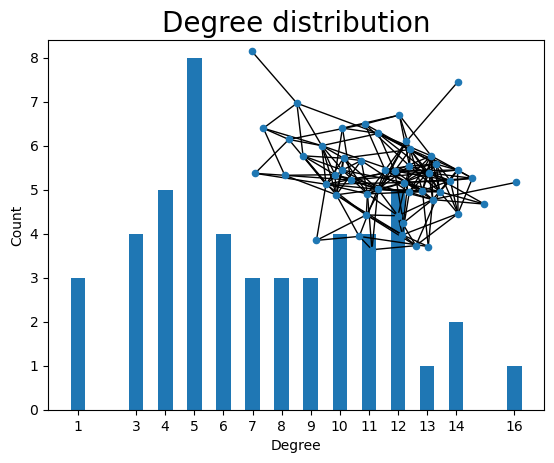

In [44]:
fig, ax = subplots()

ax.bar(deg, cnt, width=0.50)

title("Degree distribution", fontsize=20)
ax.set_xlabel("Degree", fontsize=10); ax.set_ylabel("Count", fontsize=10)
ax.set_xticks([d for d in deg]); ax.set_xticklabels(deg)

axes([0.4, 0.4, 0.5, 0.5])

neuronGraph.subgraph(sorted(nx.connected_components(neuronGraph), key=len, reverse=False)[0])

pos = nx.spring_layout(neuronGraph, seed=2)

axis("off")

nx.draw_networkx_nodes(neuronGraph, pos, node_size=20); nx.draw_networkx_edges(neuronGraph, pos)
